In [6]:
import pandas as pd

### Import Data

In [18]:
weather = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv')
weather.set_index('Datum', inplace=True)
weather.index = pd.to_datetime(weather.index)


In [19]:
weather

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Datum,,,,
2012-01-01,8.0,9.8250,14,58.0
2012-01-02,7.0,7.4375,12,NaN
2012-01-03,8.0,5.5375,18,63.0
2012-01-04,4.0,5.6875,19,80.0
2012-01-05,6.0,5.3000,23,80.0
...,...,...,...,...
2019-07-28,3.0,23.3500,14,5.0
2019-07-29,6.0,25.2500,7,61.0
2019-07-30,7.0,20.7375,8,61.0


<Axes: xlabel='Datum'>

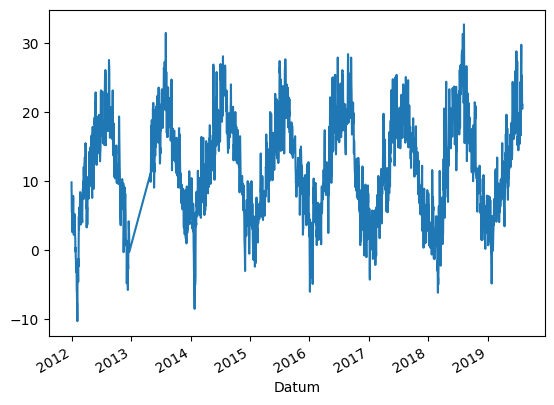

In [20]:
weather['Temperatur'].plot()

### Calc Mean Temp

In [21]:
mean_temp =  weather['Temperatur'].mean()
mean_temp

np.float64(12.099585595540177)

<Figure size 1200x600 with 0 Axes>

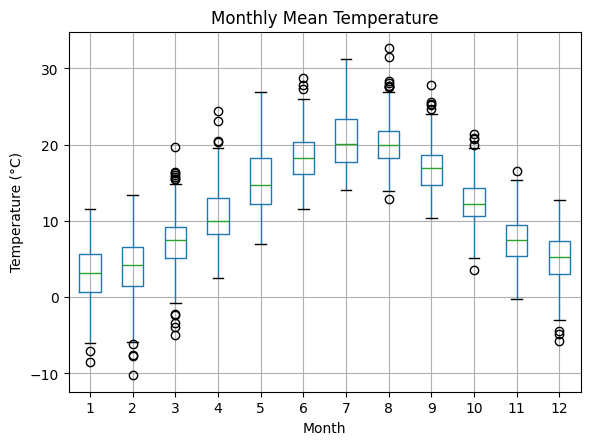

In [48]:
import matplotlib.pyplot as plt

#zusätzlicher Monats-Spalte
df = weather
df['Monat'] = df.index.month

# Boxplot: Temperaturmittel pro Monat über alle Jahre
plt.figure(figsize=(12, 6))
df.boxplot(column='Temperatur', by='Monat')
plt.title('Monthly Mean Temperature')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [ ]:
mon_mean_temp = df['Temperatur'].groupby(df['Monat']).mean()
mon_mean_temp[7]

Monat
1      2.864113
2      3.876916
3      7.360657
4     10.678464
5     15.244362
6     18.480910
7     20.751142
8     20.284715
9     16.944652
10    12.613336
11     7.398144
12     5.096247
Name: Temperatur, dtype: float64

In [61]:
from scipy.stats import ttest_ind

# Monatsmittel pro Jahr berechnen
mon_mean = weather['Temperatur'].resample('M').mean()
mon_mean.index = mon_mean.index.to_period('M')

# DataFrame mit Monatsnummer
df = mon_mean.to_frame()
df['Monat'] = df.index.month

# Nur Mai (Monat 5) und Juli (Monat 7)
mai = df[df['Monat'] == 5]['Temperatur']
juli = df[df['Monat'] == 7]['Temperatur']

# t-Test durchführen
t_stat, p_value = ttest_ind(mai, juli, equal_var=False)  # Welch's t-test

print(f"t-Wert: {t_stat:.3f}")
print(f"p-Wert: {p_value:.5f}")

t-Wert: -6.192
p-Wert: 0.00002


/tmp/ipykernel_3348/4141317595.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mon_mean = weather['Temperatur'].resample('M').mean()


In [58]:
df

,Temperatur,Monat
Datum,,
2012-01,3.395276,1
2012-02,1.070259,2
2012-03,8.948790,3
2012-04,9.092500,4
2012-05,15.128687,5
...,...,...
2019-04,11.494766,4
2019-05,13.048387,5
2019-06,20.826250,6
